In [1]:
import pandas as pd

In [2]:
#데이터 수집
df = pd.read_csv("./data/csv/basketball_stat.csv")

In [3]:
#수집된 데이터 샘플 확인
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [4]:
#현재 데이터에서 포지션 갯수 확인
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

In [5]:
#데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,1,'STL and 2P in 2d plane')

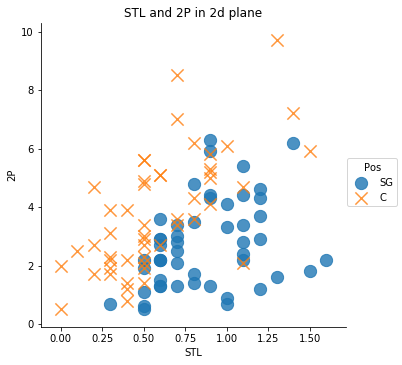

In [6]:
#스틸, 2점슛 데이터 시각화
sns.lmplot('STL', '2P', data=df, fit_reg=False,   #x축, y축, 데이터, 노 라인
                  scatter_kws={"s": 150},    #좌표 상의 점 크기
                  markers=["o", "x"],
                  hue="Pos")  #예측값

#타이틀
plt.title('STL and 2P in 2d plane')

Text(0.5,1,'BLK and 3p in 2d plane')

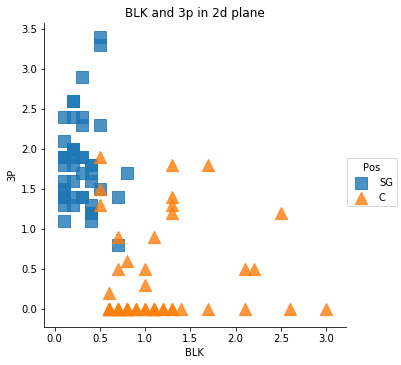

In [7]:
#블로킹, 3점슛 데이터 시각화
sns.lmplot('BLK', '3P', data=df, fit_reg=False,     #x축, y축, 데이터, 노라인
                scatter_kws={"s":150},
                markers=["s", "^"],
                hue="Pos")     #예측값

#title
plt.title('BLK and 3p in 2d plane')

Text(0.5,1,'AST and 2P in 2d plane')

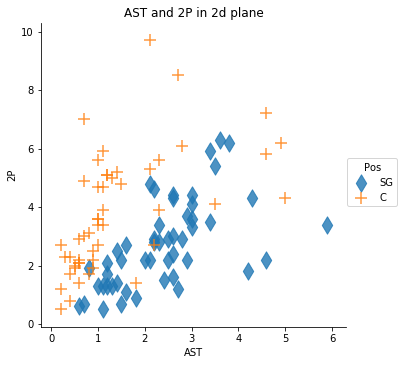

In [8]:
#어시스트 2점슛 데이터 시각화
sns.lmplot('AST', '2P', data=df, fit_reg=False,
                  scatter_kws={"s":150},
                  markers=["d", "+"],
                  hue="Pos")

#title
plt.title('AST and 2P in 2d plane')

Text(0.5,1,'TRB and 3P in 2d plane')

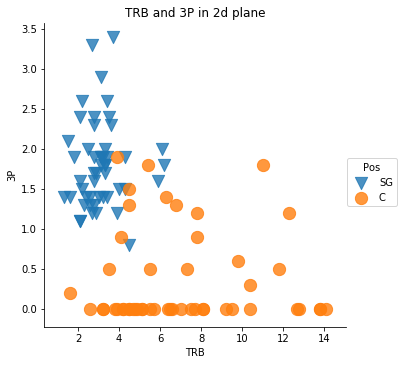

In [9]:
#Visualization : TRB and 3P
sns.lmplot('TRB', '3P', data=df, fit_reg=False,
                  scatter_kws={"s":150},
                  markers=["v", "o"],
                  hue="Pos")

#title
plt.title('TRB and 3P in 2d plane')

In [10]:
#분별력 없는 데이터 제거
df.drop(['2P', 'STL', 'AST'], axis=1, inplace=True)

In [11]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [12]:
#사이킷런의 train_test_split 사용해 데이터 나누기 가능
from sklearn.model_selection import train_test_split

In [13]:
#다듬어진 데이터에서 20%를 테스트 데이터로 분류
train, test = train_test_split(df, test_size=0.2)

In [14]:
train.shape[0]

80

In [15]:
test.shape[0]

20

In [32]:
#KNN 라이브러리 추가
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 절반까지 지정
max_k_range = train.shape[0] // 2       #tran.shape: 학습데이터의 0번 행, e.g.7//2=3(나머지의 몫)
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train=train[['Pos']]

#교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.9246031746031746,
 0.8603174603174603,
 0.8728174603174603,
 0.8728174603174603,
 0.8853174603174603,
 0.871031746031746,
 0.871031746031746,
 0.8585317460317461,
 0.8585317460317461,
 0.8585317460317461,
 0.8585317460317461,
 0.8585317460317461,
 0.8446428571428571,
 0.8446428571428571,
 0.8196428571428571,
 0.8196428571428571,
 0.8196428571428571,
 0.8196428571428571,
 0.8071428571428572]

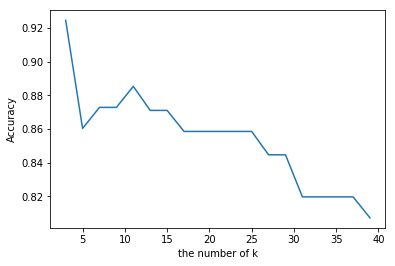

In [33]:
#k에 따른 정확도 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [42]:
#예측률이 높은 k선정
k=k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k : " + str(k))

The best number of k : 3


In [44]:
#KNN 라이브러리 추가
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=optimal_k)

#학습에 사용될 속성 지정
x_train = train[['3P', 'BLK', 'TRB']]

#선수 포지션을 예측할 값으로 지정
y_train = train[['Pos']]

#knn모델 학습
knn.fit(x_train, y_train.values.ravel())

#테스트 데이터에서 분류를 위해 사용될 속성으로 지정
x_test = test[['3P', 'BLK', 'TRB']]

#선수 포지션에 대한 정답을 지정
y_test = test[['Pos']]

#테스트 시작
pred = knn.predict(x_test)

#모델 예측 정확도 출력
print("accuracy : " +  str(accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.9


In [45]:
comparison = pd.DataFrame({'prediction' : pred, 'ground_truth': y_test.values.ravel()})
comparison

,ground_truth,prediction
0,SG,SG
1,C,C
2,C,C
3,SG,SG
4,C,C
5,SG,SG
6,SG,SG
7,C,C
8,C,C
9,SG,SG
